## Regression (Short)

In one our previous notebooks, we have seen the `LinearRegression` method, without training it. In DASC501, we have seen least-squares estimation and polynomial fitting, which were essentially linear regression. There are many more regression algorithms within `scikit-learn`. We are going to go over a selection of them, however, using the other ones are relatively easy once we get more experience. Furthermore, we will get back to tree-based ensembles later on.

In [16]:
# Get ready
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

### Linear Regression

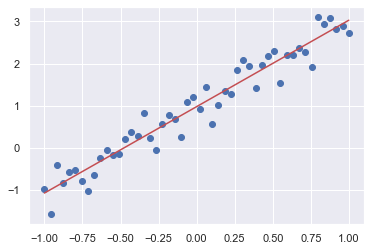

Mean Squared Error:  0.09515000291073443
Mean Absolute Error:  0.24586740203905574
R2 Score:  0.9388057807788182


In [17]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

x = np.linspace(-1,1,50)
X = x[:,np.newaxis]
y = 2*x+1+np.random.normal(0,0.25,len(x))
lr = LinearRegression(fit_intercept = True)
lr.fit(X,y)
ylr = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,ylr,'r')
plt.show()

print('Mean Squared Error: ', mean_squared_error(y,ylr))
print('Mean Absolute Error: ',  mean_absolute_error(y,ylr))
print('R2 Score: ', lr.score(X,y))


In [18]:
print("Parameters: ax + b")
print(f"a = {lr.coef_[0]:.3f}, b = {lr.intercept_:.3f}")

Parameters: ax + b
a = 2.051, b = 0.978


Scikit-learn is developed for prediction and thus doesn't perform statistical calculations. However, if you need them, such as using the parameter confidence intervals for feature selection, you either need to implement it yourself or use another module. One such module is `statsmodels`

In [19]:
import statsmodels.api as sm 
XwithIntercept = sm.add_constant(X)
model = sm.OLS(y,XwithIntercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     736.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           8.98e-31
Time:                        14:45:19   Log-Likelihood:                -12.139
No. Observations:                  50   AIC:                             28.28
Df Residuals:                      48   BIC:                             32.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9777      0.045     21.960      0.0

Another example

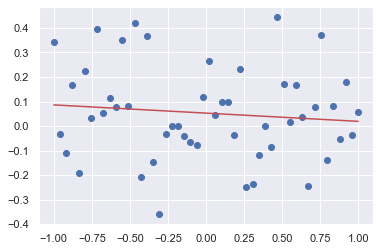

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5387
Date:                Wed, 09 Mar 2022   Prob (F-statistic):              0.467
Time:                        14:45:19   Log-Likelihood:                 12.981
No. Observations:                  50   AIC:                            -21.96
Df Residuals:                      48   BIC:                            -18.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0526      0.027      1.954      0.0

In [20]:
yRandom = np.random.normal(0,0.25,len(x))

lrRandom = LinearRegression(fit_intercept = True)
lrRandom.fit(X,yRandom)
ylrRandom = lrRandom.predict(X)

plt.scatter(X,yRandom)
plt.plot(X,ylrRandom,'r')
plt.show()

modelRandom = sm.OLS(yRandom,XwithIntercept).fit()

print(modelRandom.summary())

Multi-variate regression

In [21]:
x1 = np.linspace(-1,1,50)
x2 = np.linspace( 1,3,len(x1))

yM = -1 + 2*x1 + np.random.normal(0,0.25,len(x1)) #x2 alakasiz

xM = np.column_stack([x1,x2])

lrM  = LinearRegression(fit_intercept = True)
lrM.fit(xM, yM)

print('Sklearnden R2: ', lrM.score(xM,yM))

xMwithIntercept = sm.add_constant(xM)
modelM = sm.OLS(yM,xMwithIntercept).fit()
print(modelM.summary())

Sklearnden R2:  0.95418301369111
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     999.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           8.58e-34
Time:                        14:45:19   Log-Likelihood:                -4.2015
No. Observations:                  50   AIC:                             12.40
Df Residuals:                      48   BIC:                             16.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.01

**Warning**: The confidence intervals do not always give you good features.

### Polynomial Regression 

We have seen how to extract polynomial features, now let's use them in regression.

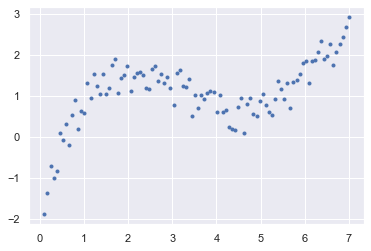

In [22]:
# Data
xP = np.linspace(0.1,7,100)    

#Adding uniform noise
yP = np.log(xP) + np.sin(xP) + np.random.uniform(-0.5,0.5,len(xP))
             
XP = xP[:,np.newaxis]

plt.plot(xP, yP,'.')

R2:  0.2877731987702814


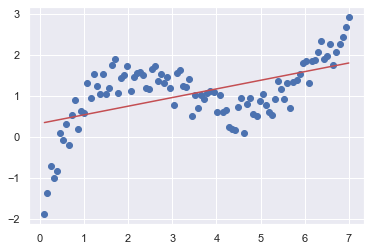

In [23]:
# Direct regression first:

lr_simple = LinearRegression()
lr_simple.fit(XP,yP)
yPrepP_simple = lr_simple.predict(XP)

print('R2: ', lr_simple.score(XP,yP))
plt.scatter(xP,yP)
plt.plot(xP,yPrepP_simple,'r')
plt.show()

R2:  0.8792380763363312


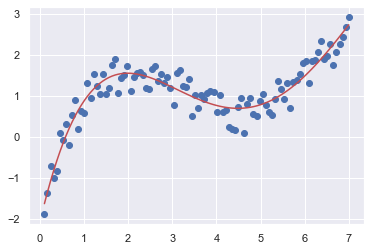

In [24]:
# Now polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Let's get te pipeline steps ready
stepsPoly = [('poly', PolynomialFeatures(4)), 
             ('lr', LinearRegression()) ]

pipePoly = Pipeline(stepsPoly)

pipePoly.fit(XP,yP)
print('R2: ', pipePoly.score(XP,yP))
yPredP = pipePoly.predict(XP)

plt.scatter(xP,yP)
plt.plot(xP,yPredP,'r')
plt.show()

The data was not generated by polynomials yet we were able to get a good fit! The reasons go beyond this course but it is about function approximation in general.

However, such methods are useful for *interpolation* and not *extrapolation*, i.e., they usually do not work for the part of the data space we have not encountered. Thus we need to be careful. 

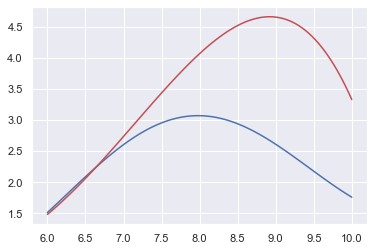

In [25]:
# To demonstrate: blue is the true function and the red is the polynomial prediction

# Data from outside the training range
xP2 = np.linspace(6,10,100)
yP2 = np.log(xP2) + np.sin(xP2)
XP2 = xP2[:,np.newaxis]
yPredP2 = pipePoly.predict(XP2)
plt.plot(xP2,yP2)
plt.plot(xP2,yPredP2,'r')
plt.show()

### Other Functions (or what I like to call Basis Function Regression)

We can use other functions as well. This is actually feature extraction (just like the previous). Let's take a look at Gaussian Radial Basis features.

RBF: $e^{-((x-c)/h)^2}$

We will also use this opportunity to devise our own transformer!

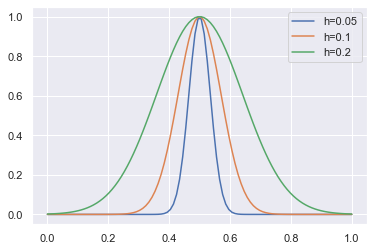

In [26]:
def rbf(x,c,h):
    # x: data
    # c: center
    # h: "width"
    return np.exp(-((x-c)/h)**2)

x = np.linspace(0,1,100)
c = np.linspace(0,1,10)

plt.plot(x,rbf(x,0.5,0.05))
plt.plot(x,rbf(x,0.5,0.1))
plt.plot(x,rbf(x,0.5,0.2))
plt.legend(['h=0.05','h=0.1','h=0.2'])
plt.show()

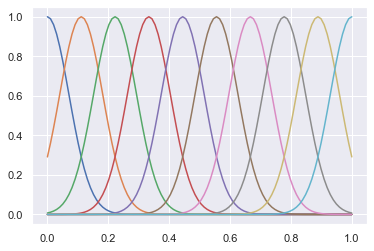

In [27]:
x = np.linspace(0,1,100)
c = np.linspace(0,1,10)
h = 0.1

for i in range(10):
    plt.plot(x,rbf(x,c[i],h))

R2:  0.8897691467288635


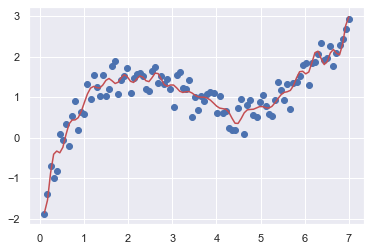

In [37]:
class GaussianRbfFeatures():
    def __init__(self, num_centers=10, width_constant=1.0):
        #We set the centers and widths automatically
        self.k = num_centers
        self.h = width_constant
    
    @staticmethod
    def _rbf(x,c,h):
        # To handle multiple dimensions
        return np.exp(-np.sum(((x-c)/h)**2, axis=1))
    
    # For the API
    def fit(self,X,y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.k)
        self.widths_ = self.h*(self.centers_[1]-self.centers_[0])
        return self
    
    # For the API
    def transform(self,X):
        return self._rbf(X[:, :, np.newaxis], self.centers_, self.widths_)
    
    # For the API
    def fit_transform(self, X, y=None):
        self.fit(X,y)
        return self.transform(X)
        
stepsRBF = [('rbf', GaussianRbfFeatures(20,0.5)), 
            ('lr', LinearRegression(fit_intercept=True)) ]

pipeRBF = Pipeline(stepsRBF)
             
pipeRBF.fit(XP,yP)
print('R2: ', pipeRBF.score(XP,yP))
yPredRBF = pipeRBF.predict(XP)

plt.scatter(xP,yP)
plt.plot(xP,yPredRBF,'r')
plt.show()
            

The above plot shows us that there is some overfit. We can search for the hyperparameters to make it better. However, our current class does not let us use hyperparameter search functions. Let's add the required parts:

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# We are now extending the required classes
class GaussianRbfFeaturesPipeline(BaseEstimator,TransformerMixin):
    def __init__(self, num_centers=10, width_constant=1.0):
        #We set the centers and widths automatically
        self.k = num_centers
        self.h = width_constant
    
    @staticmethod
    def _rbf(x,c,h):
        # To handle multiple dimensions
        return np.exp(-np.sum(((x-c)/h)**2, axis=1))
    
    # For the API
    def fit(self,X,y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.k)
        self.widths_ = self.h*(self.centers_[1]-self.centers_[0])
        return self
    
    # For the API
    def transform(self,X):
        return self._rbf(X[:, :, np.newaxis], self.centers_, self.widths_)
    
    # For the API
    def fit_transform(self, X, y=None):
        self.fit(X,y)
        return self.transform(X)
    
    # Additional methods for the hyperparameter search to work
    def get_params(self, deep=True):
        return {'num_centers':self.k,'width_constant':self.h}
    
    def set_params(self, **params):
        self.k = params['num_centers']
        self.h = params['width_constant']

R2:  0.8915315547856827
{'rbf__width_constant': 5.0, 'rbf__num_centers': 10}


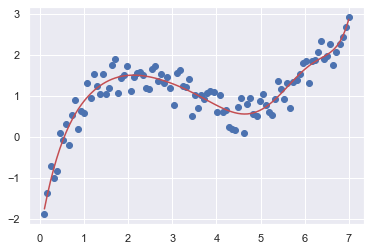

In [38]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import make_pipeline

cv = KFold(n_splits=5, shuffle=True)
paramsRBF = {'rbf__num_centers': np.arange(5,30), 
             'rbf__width_constant': np.linspace(0.25,5.0,100)}
stepsRBF2 = [('rbf', GaussianRbfFeaturesPipeline()), 
             ('lr', LinearRegression()) ]

pipeRBF2 = Pipeline(stepsRBF2)

rgbCV = RandomizedSearchCV(pipeRBF2, paramsRBF, cv=cv, n_iter=50)
rgbCV.fit(XP,yP)
print('R2: ', rgbCV.score(XP,yP))
yPredRBF2 = rgbCV.predict(XP)
print(rgbCV.best_params_ )
plt.scatter(xP,yP)
plt.plot(xP,yPredRBF2,'r')
plt.show()

We can improve (in-sample) regression with adding nonlinear features. However, we need to be careful about overfitting. One way to address this is by using cross-validation and picking appropriate hyper-parameters (includes picking the appropriate features as well). However, looking for hyper-parameters may take time and overfitting is possible even without additional features.

The question is, can we reduce overfitting indepentdently of the features and without costly hyperparameter search (this does not imply not using some sort of validation)? The answer is yes, and one such way is **regularization**.  Although it reduces training performance, it is more successful against overfitting. The main approach to regularization is to penalize the norms (most commonly L2 and L1 norms) of learned parameters. The strength of regularization is tuned by a new hyperparameter but for certain problems this is worth the trade-off and usually the burden of searching for other hyperparameters are lessened.

The L2 regularized linear regression is called *Ridge Regression*. 

R2:  0.9465900649443272


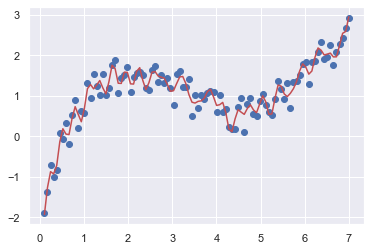

1794.8152005632726
44.009870795767505


In [42]:
from sklearn.linear_model import Ridge

pipeRBF3 = make_pipeline(GaussianRbfFeatures(50,2.), 
                         LinearRegression())
pipeRBF3.fit(XP, yP)
print('R2: ', pipeRBF3.score(XP,yP))
yPredRBF3 =  pipeRBF3.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRBF3,'r')
plt.show()

#Let's look at the parameters without regularization
#print(pipeRBF3.named_steps['linearregression'].coef_)
print(np.linalg.norm(pipeRBF3.named_steps['linearregression'].coef_))
print(pipeRBF3.named_steps['linearregression'].intercept_ )

R2:  0.8608636988434307


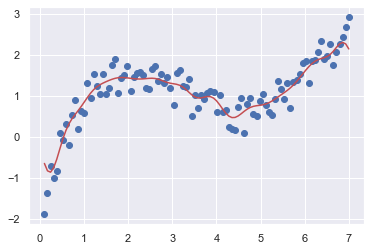

1.7291340961349009
1.036346671807045


In [43]:
pipeRbfRidge = make_pipeline(GaussianRbfFeatures(50,2.), 
                             Ridge(alpha=2.0,fit_intercept=True))
pipeRbfRidge.fit(XP, yP)
print('R2: ', pipeRbfRidge.score(XP,yP))
yPredRbfRidge =  pipeRbfRidge.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRbfRidge,'r')
plt.show()

#print(pipeRbfRidge.named_steps['ridge'].coef_)
print(np.linalg.norm(pipeRbfRidge.named_steps['ridge'].coef_))
print(pipeRbfRidge.named_steps['ridge'].intercept_ )

R2:  0.9053384154363913
{'ridge__alpha': 0.15151515151515152}


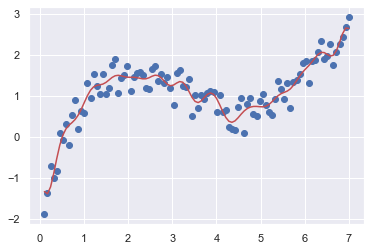

2.7461356761586453
0.9774832646892052


In [49]:
pipeRbfRidge2 = Pipeline([('rbf',GaussianRbfFeaturesPipeline(50,2.)), 
                          ('ridge',Ridge(alpha=2.0,fit_intercept=True))])

paramsRidgeRBF = {'ridge__alpha':np.linspace(0,5,100)}

rgbRidgeRBF = RandomizedSearchCV(pipeRbfRidge2, paramsRidgeRBF, cv=cv, n_iter=50)
rgbRidgeRBF.fit(XP,yP)
print('R2: ', rgbRidgeRBF.score(XP,yP))
yPredRidgeRBF2 = rgbRidgeRBF.predict(XP)
print(rgbRidgeRBF.best_params_ )
plt.scatter(xP,yP)
plt.plot(xP,yPredRidgeRBF2,'r')
plt.show()

#print(pipeRbfRidge.named_steps['ridge'].coef_)
print(np.linalg.norm(rgbRidgeRBF.best_estimator_.named_steps['ridge'].coef_))
print(rgbRidgeRBF.best_estimator_.named_steps['ridge'].intercept_ )

The L1 regularized regression is called the *Lasso Regression*. This forces some of the features to have zero weights.

R2:  0.9059623395578137


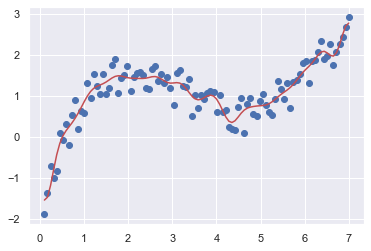

3.4301924668210098
1.1179174741294178


In [51]:
from sklearn.linear_model import Lasso

pipeRbfLasso = make_pipeline(GaussianRbfFeatures(50,2.), 
                             Lasso(alpha=0.001,fit_intercept=True))
pipeRbfLasso.fit(XP, yP)
print('R2: ', pipeRbfLasso.score(XP,yP))
yPredRbfLasso =  pipeRbfLasso.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRbfLasso,'r')
plt.show()

print(np.linalg.norm(pipeRbfLasso.named_steps['lasso'].coef_))
print(pipeRbfLasso.named_steps['lasso'].intercept_ )

In [52]:
# Lot's of zeros
print(pipeRbfLasso.named_steps['lasso'].coef_)

[-2.5669033  -0.         -0.09386737 -0.59787029 -0.         -0.38649398
 -0.05709382  0.          0.11756684  0.          0.          0.12266116
  0.23741961  0.          0.03673255  0.21751586  0.          0.
  0.32405917  0.         -0.01018087 -0.          0.24750443  0.
 -0.1595877  -0.12606029  0.          0.03306057  0.         -0.
 -0.74480162 -0.         -0.         -0.23488466 -0.07489123 -0.
 -0.27112968 -0.          0.         -0.         -0.          0.
  0.41234322  0.          0.03259925  0.87171702  0.          0.
  0.          1.64182917]


This does feature selection (only features with non-zero weights are used and thus selected). As such, we can add more features (i.e. more *basis functions*) and perform cross-validated feature selection via Lasso regression. 

When other methods do not work very well, this approach maybe used since it allows for more control over the non-linearity but needs manual intervention.

**At Home:** Look at the `ElasticNet` class of scikit-learn's linear_model submodule and perform the same steps as above

There are other regression algorithms as well. Let's see these in a typical toy dataset called the "Boston Housing Prices"

In [72]:
from sklearn import datasets

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosted Tree Regression
from sklearn.ensemble import GradientBoostingRegressor

# Neural Network Regression
from sklearn.neural_network import MLPRegressor

# Gaussian Process Regressiong
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import time
seed = int(time.time())


boston_data = datasets.load_boston()
X = boston_data['data']
y = boston_data['target']

In [ ]:
# Let's do some EDA


In [ ]:
def quickTest(X, y, clf):
    # So that every algorithm sees the same data split
    np.random.seed(seed)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    ypredT = clf.predict(Xtrain)
    method_name = type(clf).__name__ 
    train_perf = mean_squared_error(ypredT,ytrain)
    test_perf = mean_squared_error(ypred,ytest)
    print(f'{method_name}: train mse = {train_perf}, test mse = {test_perf}')
    return type(clf).__name__, train_perf, test_perf

In [ ]:
names = ['']*5
mses_train = [0]*5
mses = [0]*5

print('Lower is better:')
names[0], mses_train[0], mses[0] = quickTest(X,y,LinearRegression(fit_intercept=True))
names[1], mses_train[1], mses[1] = quickTest(X,y,RandomForestRegressor(n_estimators=100))
names[2], mses_train[2], mses[2] = quickTest(X,y,MLPRegressor(hidden_layer_sizes=(30,),
                                                      max_iter=10000))
names[3], mses_train[3], mses[3] = quickTest(X,y,GaussianProcessRegressor(kernel=DotProduct()+WhiteKernel()))
names[4], mses_train[4], mses[4] = quickTest(X,y,GradientBoostingRegressor())

plt.figure(figsize=(12,8))

plt.bar(np.arange(5),mses_train,width = 0.3)
plt.bar(np.arange(5)+0.3,mses,width = 0.3)
plt.xticks(np.arange(5)+0.15,names,rotation='vertical')
plt.legend(['Train','Test'])
plt.show()

**Question:** How do we interpret this plot?